In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [467]:
def classify_dataset(dataset):
    col_list = list(dataset.columns)
    data_types = dict(dataset.dtpyes)
    

In [468]:
df_test = pd.DataFrame(columns = ['a','b','c','d'],
                       data = [[1,'abc',2.1,5],[2,'bcd*',3.1,6],[3,'cd e',4.1,7]])

In [469]:
"""
data type
----------
np.int64
"object"
np.float64
"""

'\ndata type\n----------\nnp.int64\n"object"\nnp.float64\n'

In [470]:
"""
------Correlation------
2D_density : float64, int64
Bubble : Object, float64, int64
Connected_Scatter : Object, float64, int64
Correlogram : Object, float64, int64
Heatmap : Object, float64, int64
Scatter : float64, int64

------Distribution------
Boxplot : float64, int64
Density : float64, int64
Histogram : float64, int64
Ridgeline : Object, float64, int64
Violin : Object, float64, int64

------Evolution------
Area : Object, float64, int64
Line : Object, float64, int64
Stacked : Object, float64, int64
Streamgraph : Object, float64, int64

------Flow------
Chord_Diagram : Object, int64
Network : Object
Sankey : Object, float64, int64

------Map------
Connection : Object, float64, int64
Map_Choropleth_Hexbin : Object, float64, int64

------Part Of A Whole------
Circular_Packing : depth with json
Dendrogram : float64, int64
Donut : float64, int64
Pie_Chart : float64, int64
Tree : float64, int64
Venn : float64, int64
"""

'\n------Correlation------\n2D_density : float64, int64\nBubble : Object, float64, int64\nConnected_Scatter : Object, float64, int64\nCorrelogram : Object, float64, int64\nHeatmap : Object, float64, int64\nScatter : float64, int64\n\n------Distribution------\nBoxplot : float64, int64\nDensity : float64, int64\nHistogram : float64, int64\nRidgeline : Object, float64, int64\nViolin : Object, float64, int64\n\n------Evolution------\nArea : Object, float64, int64\nLine : Object, float64, int64\nStacked : Object, float64, int64\nStreamgraph : Object, float64, int64\n\n------Flow------\nChord_Diagram : Object, int64\nNetwork : Object\nSankey : Object, float64, int64\n\n------Map------\nConnection : Object, float64, int64\nMap_Choropleth_Hexbin : Object, float64, int64\n\n------Part Of A Whole------\nCircular_Packing : depth with json\nDendrogram : float64, int64\nDonut : float64, int64\nPie_Chart : float64, int64\nTree : float64, int64\nVenn : float64, int64\n'

### 워크래프트3에서는 챔피언(영웅)별로 스킬의 shortcut이 달랐다.
### 롤(League Of Legend)에서는 모든 챔피언의 스킬이 Q, W, E, R로 통일되어 있다.
### 따라서, 각각의 그래프가 사용하는 라이브러리(seaborn, plotly, matplotlib 등)가 각각 다르고,
### parameter들 또한 상이(pallete, cmap, color 등)하여, 하나로 통일시키고자하는 작업을 진행하고자 한다.

In [30]:
# ------Correlation------

def Density(dataset, x, y, cmap="Greens", bw_adjust=0.5, fill=True):
      import seaborn as sns
      import matplotlib.pyplot as plt
      
      sns.kdeplot(x=dataset[x], 
                  y=dataset[y], 
                  cmap=cmap, 
                  fill=fill, 
                  bw_adjust = bw_adjust)
      plt.show()

def Hist2D(x, y, bins=(50,50), cmap=None):
      import matplotlib.pyplot as plt
      if cmap ==None :
            cmap = plt.cm.jet
      else:
            cmap = cmap

      plt.hist2d(x, y, bins=bins, cmap=cmap)
      plt.show()

def Bubble(dataset, x, y, cmap="viridis", size=None, hue=None, edgecolors='black', sizes=(20, 2000)):
      import seaborn as sns
      import matplotlib.pyplot as plt

      sns.scatterplot(data=dataset, x=x, 
                y=y, 
                legend=False,
                palette=cmap,
                size = size,
                hue = hue,
                sizes = sizes,
                edgecolors=edgecolors)

      plt.show()

def Connected_Scatter(dataset, x, y, cmap='mediumvioletred',marker='o', alpha=.5):
      import matplotlib.pyplot as plt

      plt.plot(x,
            y,
            data=dataset,
            alpha=alpha,
            marker=marker,
            color=cmap)

      plt.show()

def pairplot(dataset, kind="reg", hue=None, cmap="Set2", markers = None, corner=True):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.pairplot(dataset, 
                kind=kind, 
                hue=hue, 
                markers = markers,
                palette=cmap,
                corner=corner)
    plt.show()

def Heatmap(dataset, cmap="Greens", annot=True, annot_kws={"size":7}):
    
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.heatmap(dataset, 
                cmap=cmap, 
                annot=annot, 
                annot_kws=annot_kws)
    plt.show()

def Scatterplot(dataset, x, y, fit_reg=False, x_thresh=None, y_thresh=None, lines = False):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    if x_thresh == None:
        value = dataset[y] > y_thresh
    elif y_thresh == None:
        value = dataset[x] > x_thresh
    else:
        value=(dataset[x] > x_thresh) & (dataset[y] > y_thresh)

    dataset['color']= np.where(value==True , "#9b59b6", "green")

    sns.regplot(data=dataset, 
                x=x,
                y=y, 
                fit_reg=fit_reg, 
                scatter_kws={'facecolors':dataset['color']})

    # lines가 True일 때 x_thresh에 맞추어 선 그림
    if (lines == True) and (x_thresh != None) and (y_thresh != None):
        plt.axvline(x=x_thresh, color='r',linestyle='dashed')
        plt.axhline(y=y_thresh, color='r',linestyle='dashed')
    elif (lines == True) and (x_thresh != None):
        plt.axvline(x=x_thresh, color='r',linestyle='dashed')
    elif (lines == True) and (y_thresh != None):
        plt.axhline(y=y_thresh, color='r',linestyle='dashed')
    else:
        pass
    plt.show()

def Joint_plot(dataset, x, y, bins=30, fill=True, kind='hex', cmap = 'gray') :
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.jointplot(x=dataset[x], 
                y=dataset[y], 
                kind= kind, 
                color=cmap,
                marginal_kws=dict(bins=bins, fill=fill))

    plt.show()

    
# ------Distribution------

def Violin(dataset, x, y):
    import scipy.stats as st
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    species_ = sorted(dataset[x].unique())
    y_data = [dataset[dataset[x] == specie][y].values for specie in species_]

    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    POSITIONS = list(range(len(species_)))
    COLOR_SCALE = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(species_))]

    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"

    fig, ax = plt.subplots(figsize= (14, 10))
    violins = ax.violinplot(
        y_data, 
        positions=POSITIONS,
        widths=0.45,
        bw_method="silverman",
        showmeans=False, 
        showmedians=False,
        showextrema=False
    )

    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(1.4)
        pc.set_alpha(1)

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # 이상치 표시x
        showcaps = False,   # 캡표시x
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.7)

    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)

        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
        
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15 
            ),
            zorder=10 
        )


    xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species_)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")


def Violin_split(dataset, x, y, hue=None, cmap=None, number=None, linewidth=.1, figsize=(10,3), violin_cmap=['gold','orange'], title=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_context("talk")
    sns.set_style("white")

    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    sns.violinplot(data=dataset, x=x, y=y, ax=ax,
                color=cmap, hue=hue, split=True, palette=cmap, linewidth=linewidth)
    
    number = number
    v_left_color = violin_cmap[0]
    v_right_color = violin_cmap[1]

    # 바이올린의 왼쪽부분
    violins_Left = [c for i, c in enumerate(ax.collections) if i%3 == 0]  
    [v.set_edgecolor("gray") for v in violins_Left]
    [v.set_linewidth(1) for v in violins_Left]
    violins_Left[number].set_facecolor(v_left_color)    # facecolor 변경
    violins_Left[number].set_linewidth(1)               # line 굵기 변경
    violins_Left[number].set_edgecolor("k")             # edgecolor 변경

    # 바이올린의 오른쪽부분
    violins_Right = [c for i, c in enumerate(ax.collections) if i%3 == 2]  
    [v.set_edgecolor("gray") for v in violins_Right]
    [v.set_linewidth(1) for v in violins_Right]
    violins_Right[number].set_facecolor(v_right_color)  # facecolor 변경
    violins_Right[number].set_linewidth(1)              # line 굵기 변경
    violins_Right[number].set_edgecolor("k")            # edgecolor 변경

    # 바이올린의 마커부분
    markers = [c for i, c in enumerate(ax.collections) if i%3 == 1]  
    markers[number].set_facecolor("w")         # facecolor 변경
    markers[number].set_edgecolor("k")         # edgecolor 변경
    [m.set_sizes([50]) for m in markers]  # 전체 median size 변경

    # box-whisker: Line2D
    ls = [l for i, l in enumerate(ax.lines)]
    ls[number*2].set_color("k")                 # whisker 색상 변경
    ls[number*2+1].set_color("k")                 # box 색 변경
    [l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
    [l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

    # # spines 제거, grid 추가, xlabel 제거, ylabel 제거
    ax.set_ylim()
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title)
    ax.spines[["left", "top", "right"]].set_visible(False)
    ax.grid(axis="y", lw=1)
    legend = ax.legend()
    legend.remove()
    fig.legend(loc="upper right", ncol=2)
    

def Histo_Up_Down(dataset, x, y, bins=20, cmap=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.histplot(dataset[x], stat="density", bins=bins, edgecolor='black')

    # 변수2의 히스토그램
    n_bins = bins
    # get positions and heights of bars
    heights, bins = np.histogram(dataset[y], density=True, bins=n_bins) 
    # -1을 곱해서 아래쪽으로 내리기
    heights *= -1
    bin_width = np.diff(bins)[0]
    bin_pos =( bins[:-1] + bin_width / 2) * -1

    # plot
    plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

    # show the graph
    plt.show()

def Density_Up_Down(dataset, x, y, bins=20, fill=True):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from numpy import linspace
    
    sns.kdeplot(data=dataset, x=x, fill=fill, alpha=.5)

    # plot density chart for var2
    kde = gaussian_kde(dataset[y])
    x_range = linspace(min(dataset[y]), max(dataset[y]), len(dataset[y]))

    # multiply by -1 to reverse axis (mirror plot)
    sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange') 
    plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange', alpha = .5)

    plt.axhline(y=0, linestyle='-',linewidth=1, color='black')

    plt.show()

def Histogram_four(dataset, x, y):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(2,2)
    fig.set_size_inches((16,16))
    multiple_list = ['layer', 'dodge', 'stack', 'fill']
    for i in range(4):
        row = i//2
        col = i%2
        cur_ax = ax[row, col]
        sns.histplot(data=dataset, x=x,
                        hue=y,
                        hue_order=list(dataset[y].unique()),
                        palette='cool', ## 컬러맵 지정
                        multiple=multiple_list[i], ## 여러 히스토그램 그리는 방식
                        ax=cur_ax,
                        ) 
        cur_ax.set_title(multiple_list[i])
    plt.tight_layout()
    
def joyplot(dataset, x, y, hue=None, cmap = 'coolwarm'):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    pal = sns.color_palette(palette=cmap, n_colors=len(dataset[y].unique()))

    dict_ = dict(zip(list(range(1,len(dataset[y].unique())+1)),list(dataset[y].unique())))

    # FacetGrid 설정 : 여러개의 그래프 표현
    g = sns.FacetGrid(dataset,
                    row=y,           # 행
                    hue=hue,      # 색조
                    aspect=15,             # 너비
                    height=0.75,           # 높이
                    palette=pal            # palette 색상
                    )

    # kdeplot 추가
    g.map(sns.kdeplot,
        x,
        bw_adjust=1,                       # 곡선 굴곡(윤곽선)
        clip_on=False,                     # 그래프가 범위를 넘어가더라도 자르지 않고 그림
        fill=True,                         # 밀도 곡선 아래 영역을 채움
        alpha=0.5,                         # 영역 명암
        linewidth=0                        # 곡선 굵기
        )

    # kdeplot에서 윤곽선 추가
    g.map(sns.kdeplot,
        x,
        bw_adjust=1,                       # 곡선 굴곡(윤곽선)
        clip_on=False,                     # 그래프가 범위를 넘어가더라도 자르지 않고 그림
        color="w",                         # 윤곽선의 색상
        lw=2                               # 윤곽선의 굵기
        )

    # 수평선 추가
    g.map(plt.axhline,                       # 수평선을 그리는 함수
        y=0,                               # 수평선의 위치
        lw=2,                              # 수평선의 굵기
        clip_on=False                      # 그래프가 범위를 넘어가더라도 자르지 않고 그림
        )

    # 각 축에 텍스트 추가
    for i, ax in enumerate(g.axes.flat):
        ax.text(-15, 0.02,                          # 텍스트의 위치
                dict_[i+1],                    # month_dict에서 해당 텍스트를 가져옴
                fontweight='bold',                  # 텍스트 굵기
                fontsize=15,                        # 텍스트 사이즈
                color=ax.lines[-1].get_color())     # 텍스트의 색상을 해당축의 컬러와 동일하게

    # 그래프 겹치기 효과
    g.fig.subplots_adjust(hspace=-0.3)

    # 축 제곰목 제거 및 추가 설정
    g.set_titles("")
    g.set(yticks=[])
    g.set(ylabel="")
    g.despine(bottom=True, left=True)

    plt.show()

# ------Evolution------

def Area(dataset, x, y, num=None, hue=None):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt

    g = sns.FacetGrid(dataset, col=hue, hue=hue, col_wrap=num, )

    g = g.map(plt.plot,  x,  y)
 
    g = g.map(plt.fill_between, x, y, alpha=0.2).set_titles("{col_name}")
    
    plt.subplots_adjust(top=0.92)

    plt.show()

def Line(dataset, x, y, interval=6, format_="%Y-%m"):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    fig, ax = plt.subplots(figsize=(8, 6))
        
    locator = mdates.MonthLocator(interval=interval)
    formatter = mdates.DateFormatter(format_)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dataset[x], dataset[y])
    
    fig.autofmt_xdate()
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.show()

def Stack_Percent(dataset, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np

    data_perc = dataset.divide(dataset.sum(axis=1), axis=0)
    
    x = np.arange(1,len(dataset)+1)
    y = np.array(data_perc.T)

    fig, ax = plt.subplots()

    ax.stackplot(x, y, colors=cmap, labels=list(dataset.columns))
    
    ax.legend(facecolor="white", loc='upper right')
    ax.margins(0, 0)
    plt.xticks(np.arange(1,len(dataset)+1))
    plt.show()

def Stream(dataset, x, y, sd=1.5, cmap=None, num=500, baseline='zero', XTICKS=[2020,2013]):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    import random

    x = dataset.index
    y = dataset[y].T.values
    grid = np.linspace(min(x)-5, max(x)+5, num=num)

    cmap = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(y))]

    def gaussian_smooth(x, y, grid, sd):
        weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
        weights = weights / weights.sum(0)
        return (weights * y).sum(1)
    

    y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]

    fig, ax = plt.subplots(figsize=(10, 7))

    ax.stackplot(grid, y_smoothed, baseline=baseline, colors=cmap) # baseline : {'zero', 'sym', 'wiggle', 'weighted_wiggle'}

    ax.yaxis.set_visible(False)  
    ax.xaxis.set_visible(True)

    # ax.tick_params(axis="x", labeltop=True, length=0)
    ax.set_xticks(XTICKS)
    ax.set_xticklabels([f"Issue\n#{x}" for x in XTICKS], color="#4d4d4d")


    ax.spines["left"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    XTICKS = XTICKS

    for x in XTICKS:
        ax.axvline(x, color="#000000", ls=(0, (1, 2)), zorder=10)
    
    plt.show()


# ------Flow------
def Chord(dataset):
    from pycirclize import Circos

    circos = Circos.initialize_from_matrix(
        dataset,
        space=5,
        cmap="tab10",
        label_kws=dict(size=12),
        link_kws=dict(ec="black", lw=0.5, direction=1),
    )

    circos.plotfig()

# ------Map------
def pydeck_pop(dataset, x):
    import pydeck as pdk
    import geopandas as gpd
    import pandas as pd
    import json
    
    df = gpd.read_file(dataset)

    if json.load(open(dataset, encoding='utf-8'))['features'][0]['geometry']['type'] == 'MultiPolygon':
        # pydeck은 geometry 컬럼의 shapely.geometry.multipolygon 타입을 읽지 못하여 아래와 같이 변경하는 작업을 해줌
        # multipolygon을 polygon들로 변경 후 진행하여야 함

        df['polygons'] = df['geometry'].apply(lambda x : list(x.geoms))

        def polygon_to_coordinates(x):
            lon, lat = x[0].exterior.xy
            return [[x, y] for x, y in zip(lon, lat)]

        df['coordinates'] = df['polygons'].apply(polygon_to_coordinates)
        del df['geometry']
        del df['polygons']
    else:
        df['coordinates'] = df['geometry']
        del df['geometry']

    df['norm_x'] = df[x] / df[x].max()

    df = pd.DataFrame(df)

    layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    df, # 시각화에 쓰일 데이터프레임
    extruded = True,
    get_elevation = x,
    elevation_scale = 0.05,
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*norm_x, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    )
    
    # Set the viewport location
    center = [126.986, 37.565]
    view_state = pdk.ViewState(
        longitude=center[0],
        latitude=center[1],
        zoom=10)
    
    view_state.bearing=15
    view_state.pitch=45

    r = pdk.Deck(layers=[layer], initial_view_state=view_state)

    display(r.to_html())

def pydeck_distribution(dataset, center=[126.986, 37.565]):
    import pydeck as pdk
    
    layer_list = ['ScatterplotLayer', 'HeatmapLayer', 'CPUGridLayer']

    for lay in layer_list:
        layer = pdk.Layer(
            lay,
            dataset,
            get_position='[X_WGS84, Y_WGS84]',
            get_radius=50,
            get_fill_color='[255, 255, 255]',
            pickable=True,
            auto_highlight=True
        )

        center = center
        view_state = pdk.ViewState(
            longitude=center[0],
            latitude=center[1],
            zoom=10)

        r = pdk.Deck(layers=[layer], initial_view_state=view_state)

        display(r)

def pydeck_connection(dataset_01, dataset_02):
    # dataset's col_names : ['start_id', 'end_id', 'start_lng', 'start_lat', 'end_lng', 'end_lat']
    import pydeck as pdk

    layer = pdk.Layer(
        'ArcLayer',
        dataset_01,
        get_source_position='[start_lng, start_lat]',
        get_target_position='[end_lng, end_lat]',
        get_source_color='[255, 255, 120]',
        get_target_color='[255, 255, 120]',
        pickable=True,
        auto_highlight=True
    )

    layer2 = pdk.Layer(
        'ArcLayer',
        dataset_02,
        get_source_position='[start_lng, start_lat]',
        get_target_position='[end_lng, end_lat]',

        get_source_color = '[120,255,255]',
        get_target_color = '[120,255,255]',

        pickable=True,
        auto_highlight=True
    )

    view_state = pdk.data_utils.compute_view(dataset_01[['start_lng', 'start_lat']].values)
    view_state.zoom = 12
    view_state.bearing = -15
    view_state.pitch = 45

    r = pdk.Deck(layers=[layer, layer2], initial_view_state=view_state)
    display(r.to_html())

def choroleth(dataset, geojson, x, y, scope='usa'):
    import plotly.express as px
    fig = px.choropleth(dataset, 
    geojson=geojson, 
    locations=x, 
    color=y,
    color_continuous_scale="cividis",
    range_color=(0, round(max(dataset[y])/2)),
    scope=scope,
    labels={y:f'{y} rate'}
    )

    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    fig.update_layout(coloraxis_colorbar=dict(
        thicknessmode="pixels", thickness=10,
        lenmode="pixels", len=150,
        yanchor="top", y=0.8,
        ticks="outside", ticksuffix=" %",
        dtick=5
    ))

    fig.show()


# ------Part of A Whole------
def Pie(dataset):
        import random
        import matplotlib.pyplot as plt

        colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(dataset))]

        names=dataset.index
        size_of_groups=dataset[dataset.columns[0]].values.tolist()

        plt.pie(size_of_groups, 
                labels= names, 
                labeldistance = 1.15,
                wedgeprops = {'linewidth' : 3,
                              'edgecolor' : 'white'},
                colors=colors)
        plt.show()

def Donut(dataset):
        import random
        import matplotlib.pyplot as plt

        colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(dataset))]

        names=dataset.index
        size_of_groups=dataset[dataset.columns[0]].values.tolist()

        my_circle = plt.Circle((0,0), # 원의 중심
                       .4, # 반지름 퍼센트
                       color='white') # 색상

        plt.pie(size_of_groups, 
                labels= names, 
                labeldistance = 1.15,
                wedgeprops = {'linewidth' : 3, 
                        'edgecolor' : 'white'},
                colors=colors)
        
        p = plt.gcf()
        p.gca().add_artist(my_circle) # 세팅한 원 pie chart에 추가하기

        plt.show()

def venn_(dataset, x):
    from venn import venn
    target = {}
    for i in range(len(dataset)):
        temp_01 = dataset.index[i]
        temp_02 = dataset[dataset.columns[x]][i]
  
        target[temp_01] = temp_02

    venn(target)


def mosaic_(dataset, cmap='summer'):
    import itertools
    import matplotlib.pyplot as plt
    from statsmodels.graphics.mosaicplot import mosaic

    tmp_list = []
    for i in range(len(dataset.columns)):
        tmp_list.append(list(set(dataset[dataset.columns[i]])))
        
    print(*tmp_list)

    tmp_01 = list(itertools.product(*tmp_list))
    num_categories = len(tmp_01)

    cmap = plt.get_cmap(cmap)
    category_colors = [cmap(i / num_categories) for i in range(num_categories)]

    props = {}
    for i in range(num_categories):
        props[tmp_01[i]] = {'color':category_colors[i]}

    mosaic_data = dataset.groupby(list(dataset.columns)).size().unstack().fillna(0)
    mosaic(mosaic_data.stack(), gap=0.05, properties=props)

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic


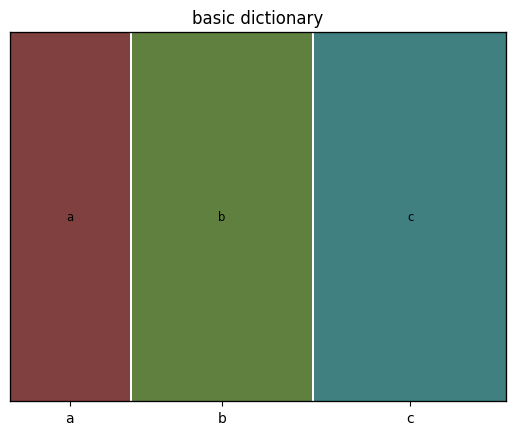

In [207]:
data = {'a': 10, 'b': 15, 'c': 16}
mosaic(data, title='basic dictionary')
plt.show()

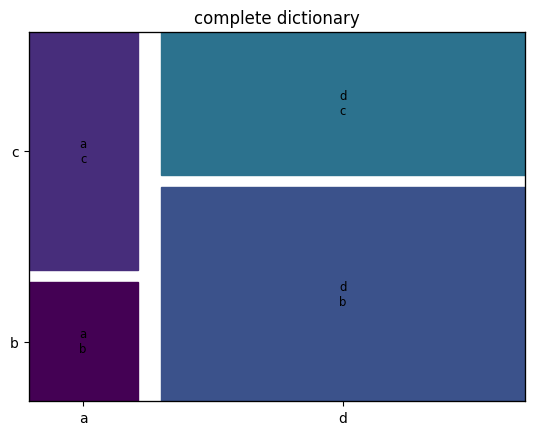

In [322]:
data = {('a', 'b'): 1, ('a', 'c'): 2, ('d', 'b'): 6, ('d', 'c'): 4}
props = {('a', 'b'): {'color': (0.267004, 0.004874, 0.329415, 1.0)}, 
         ('a', 'c'): {'color': (0.278826, 0.17549, 0.483397, 1.0)},
         ('d', 'b'): {'color': (0.229739, 0.322361, 0.545706, 1.0)},
         ('d', 'c'): {'color': (0.172719, 0.448791, 0.557885, 1.0)}}
mosaic(data, gap=0.05, title='complete dictionary', properties=props)
plt.show()

In [ ]:
import itertools

In [303]:
x = ['yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes']
y = ['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']
z = ['no', 'yes', 'no', 'yes', 'no', 'yes', 'no']
data = pd.DataFrame({'x': x, 'y': y, 'z':z})

In [304]:
aa = list(itertools.product(data.columns.to_list(), data.index.to_list()))

In [313]:
bb = list(itertools.product(['yes','no'], ['yes','no'],['yes','no']))

In [315]:
bb = list(itertools.product(['yes','no'], ['yes','no'],['yes','no']))
num_categories = len(bb)
cmap = plt.get_cmap('viridis')
category_colors = [cmap(i / num_categories) for i in range(num_categories)]

props = {}
for i in range(num_categories):
    props[bb[i]] = {'color':category_colors[i]}

In [316]:
category_colors = [cmap(i / num_categories) for i in range(num_categories)]

In [331]:
props = {}
for i in range(num_categories):
    props[bb[i]] = {'color':category_colors[i]}

In [318]:
data

,x,y,z
0,yes,yes,no
1,yes,yes,yes
2,yes,yes,no
3,no,yes,yes
4,yes,no,no
5,no,no,yes
6,yes,no,no


In [332]:
props

{('yes', 'yes', 'yes'): {'color': (0.267004, 0.004874, 0.329415, 1.0)},
 ('yes', 'yes', 'no'): {'color': (0.278826, 0.17549, 0.483397, 1.0)},
 ('yes', 'no', 'yes'): {'color': (0.229739, 0.322361, 0.545706, 1.0)},
 ('yes', 'no', 'no'): {'color': (0.172719, 0.448791, 0.557885, 1.0)},
 ('no', 'yes', 'yes'): {'color': (0.127568, 0.566949, 0.550556, 1.0)},
 ('no', 'yes', 'no'): {'color': (0.157851, 0.683765, 0.501686, 1.0)},
 ('no', 'no', 'yes'): {'color': (0.369214, 0.788888, 0.382914, 1.0)},
 ('no', 'no', 'no'): {'color': (0.678489, 0.863742, 0.189503, 1.0)}}

In [334]:
props

{('yes', 'yes', 'yes'): {'color': (0.267004, 0.004874, 0.329415, 1.0)},
 ('yes', 'yes', 'no'): {'color': (0.278826, 0.17549, 0.483397, 1.0)},
 ('yes', 'no', 'yes'): {'color': (0.229739, 0.322361, 0.545706, 1.0)},
 ('yes', 'no', 'no'): {'color': (0.172719, 0.448791, 0.557885, 1.0)},
 ('no', 'yes', 'yes'): {'color': (0.127568, 0.566949, 0.550556, 1.0)},
 ('no', 'yes', 'no'): {'color': (0.157851, 0.683765, 0.501686, 1.0)},
 ('no', 'no', 'yes'): {'color': (0.369214, 0.788888, 0.382914, 1.0)},
 ('no', 'no', 'no'): {'color': (0.678489, 0.863742, 0.189503, 1.0)}}

In [338]:
x = ['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no','no', 'no']
y = ['yes', 'yes', 'no', 'no', 'no', 'no', 'yes','no', 'no']
z = ['yes', 'no', 'yes', 'no','no', 'yes', 'no','no', 'yes']

data = pd.DataFrame({'x': x, 'y': y,'z':z})

In [342]:
list(set(x))

['no', 'yes']

In [385]:
def mosaic_(dataset, cmap='summer'):
    import itertools
    import matplotlib.pyplot as plt
    from statsmodels.graphics.mosaicplot import mosaic

    tmp_list = []
    for i in range(len(dataset.columns)):
        tmp_list.append(list(set(dataset[dataset.columns[i]])))
        
    print(*tmp_list)

    tmp_01 = list(itertools.product(*tmp_list))
    num_categories = len(tmp_01)

    cmap = plt.get_cmap(cmap)
    category_colors = [cmap(i / num_categories) for i in range(num_categories)]

    props = {}
    for i in range(num_categories):
        props[tmp_01[i]] = {'color':category_colors[i]}

    mosaic_data = dataset.groupby(list(dataset.columns)).size().unstack().fillna(0)
    mosaic(mosaic_data.stack(), gap=0.05, properties=props)

['no', 'yes'] ['no', 'yes'] ['no', 'yes']


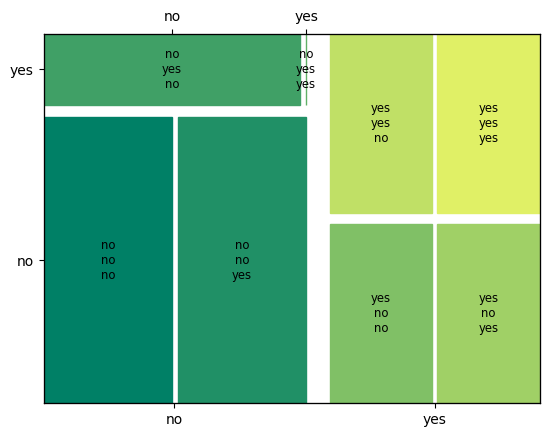

In [386]:
mosaic_(data)

In [355]:
bb[0]

('yes', 'yes', 'yes')

In [339]:
bb = list(itertools.product(['yes','no'], ['yes','no'],['yes','no']))
num_categories = len(bb)
cmap = plt.get_cmap('viridis')
category_colors = [cmap(i / num_categories) for i in range(num_categories)]

props = {}
for i in range(num_categories):
    props[bb[i]] = {'color':category_colors[i]}

(<Figure size 640x480 with 3 Axes>,
 {('no', 'no', 'no'): (0.0, 0.0, 0.2587991718426501, 0.7741935483870969),
  ('no', 'no', 'yes'): (0.270301357257879,
   0.0,
   0.2587991718426501,
   0.7741935483870969),
  ('no', 'yes', 'no'): (0.0,
   0.806451612903226,
   0.5175983436853002,
   0.19354838709677416),
  ('no', 'yes', 'yes'): (0.5291005291005291,
   0.806451612903226,
   0.0,
   0.19354838709677416),
  ('yes', 'no', 'no'): (0.5767195767195767,
   0.0,
   0.2070393374741201,
   0.48387096774193555),
  ('yes', 'no', 'yes'): (0.7929606625258799,
   0.0,
   0.2070393374741201,
   0.48387096774193555),
  ('yes', 'yes', 'no'): (0.5767195767195767,
   0.5161290322580646,
   0.2070393374741201,
   0.48387096774193555),
  ('yes', 'yes', 'yes'): (0.7929606625258799,
   0.5161290322580646,
   0.2070393374741201,
   0.48387096774193555)})

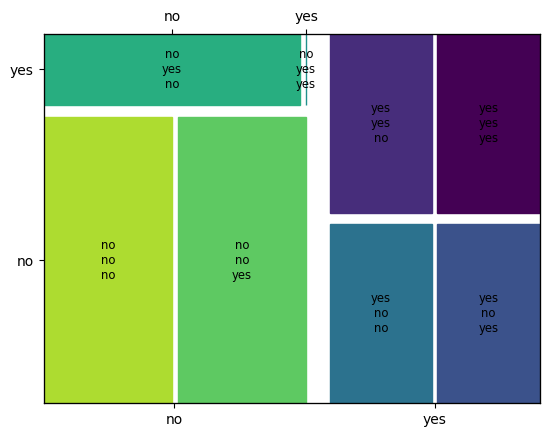

In [340]:
mosaic_data = data.groupby(['x', 'y','z']).size().unstack().fillna(0)
mosaic(mosaic_data.stack(), gap=0.05, properties=props)

(<Figure size 640x480 with 3 Axes>,
 {('yes', 'yes'): (0.0, 0.0, 1.0, 0.5695301376364499),
  ('yes', 'no'): (0.0, 0.5728523967726624, 1.0, 0.42714760322733747)})

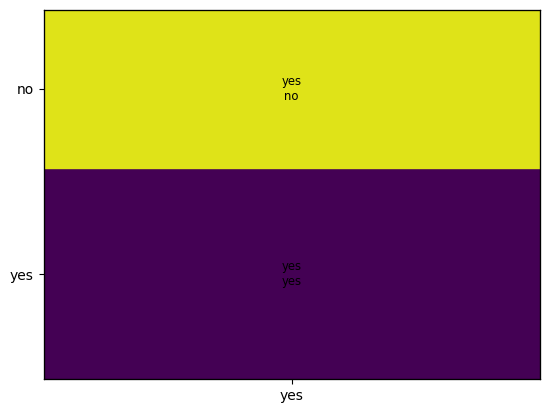

In [302]:
x = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
y = ['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']
data = pd.DataFrame({'x': x, 'y': y})

props = {}
props[('yes', 'yes')] = {'color': (0.267004, 0.004874, 0.329415, 1.0)}
props[('yes','no')] = {'color': (0.876168, 0.891125, 0.09525, 1.0)}
data = pd.DataFrame({'x': x, 'y': y})
mosaic(data, ['x', 'y'], properties=props)

In [323]:
mosaic_data

z         no  yes
x   y            
no  no   0.0  1.0
    yes  0.0  1.0
yes no   2.0  0.0
    yes  2.0  1.0

TypeError: 'list' object is not callable

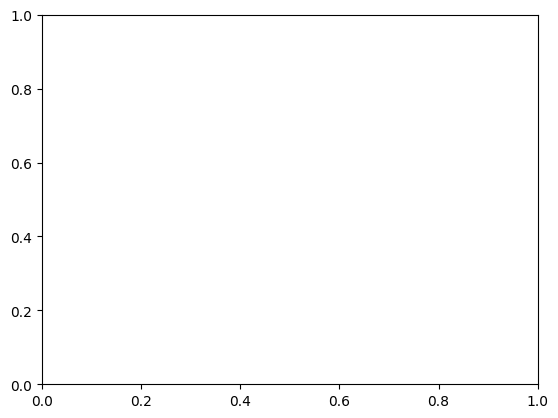

In [281]:
import seaborn as sns
mosaic_data = data.groupby(['x', 'y','z']).size().unstack().fillna(0)
mosaic(mosaic_data.stack(), gap=0.01, properties=category_colors)
plt.show()